In [208]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "C:/Users/MeliC\OneDrive/Desktop/Module_5/Mouse_metadata.csv"
study_results_path = "C:/Users/MeliC/OneDrive/Desktop/Module_5/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
combined_data.head()

<>:7: SyntaxWarning: invalid escape sequence '\O'
<>:7: SyntaxWarning: invalid escape sequence '\O'
C:\Users\MeliC\AppData\Local\Temp\ipykernel_21636\2954200252.py:7: SyntaxWarning: invalid escape sequence '\O'
  mouse_metadata_path = "C:/Users/MeliC\OneDrive/Desktop/Module_5/Mouse_metadata.csv"


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [209]:
# Checking the number of mice.
num_mice = combined_data['Mouse ID'].nunique()
print(f"Number of unique mice: {num_mice}")

Number of unique mice: 249


In [210]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mouse_ids = duplicate_mice['Mouse ID'].unique()
print(f"array({duplicate_mouse_ids}, dtype=object)")

array(['g989'], dtype=object)


In [211]:
# Optional: Get all the data for the duplicate mouse ID.
all_duplicate_data = combined_data[combined_data['Mouse ID'].isin(duplicate_mouse_ids)]
display(all_duplicate_data)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [212]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = combined_data[~combined_data['Mouse ID'].isin(duplicate_mouse_ids)]
cleaned_data.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [213]:
# Checking the number of mice in the clean DataFrame.
unique_mice_count = cleaned_data['Mouse ID'].nunique()
print(f"Number of unique mice in the cleaned data: {unique_mice_count}")


Number of unique mice in the cleaned data: 248


## Summary Statistics

In [214]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
summary_stats = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean='mean',
    median='median',
    var='var',
    std='std',
    sem='sem'
)
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

display(summary_stats)


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [215]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
summary_stats.columns = ['Mean Tumor Volume', 'Median Tumor Volume', 'Tumor Volume Variance', 
                         'Tumor Volume Std. Dev.', 'Tumor Volume Std. Err.']
display(summary_stats)
# Using the aggregation method, produce the same summary statistics in a single line



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

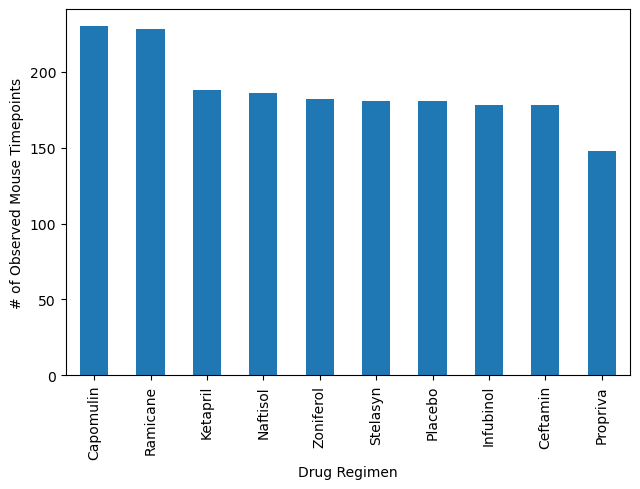

In [216]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen_counts = cleaned_data['Drug Regimen'].value_counts()
ax = drug_regimen_counts.plot(kind='bar', figsize=(6.5,5), color='#1f77b4')
ax.set_xlabel('Drug Regimen', fontsize=10)
ax.set_ylabel('# of Observed Mouse Timepoints', fontsize=10)
plt.xticks(rotation=90,ha='center')
plt.tight_layout()
plt.show()


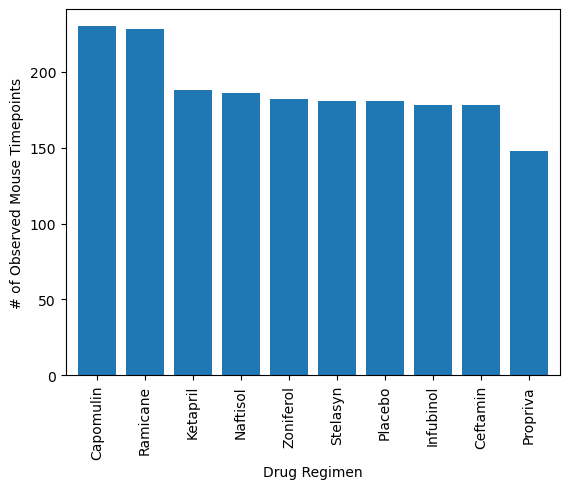

In [217]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimen_counts = cleaned_data['Drug Regimen'].value_counts()
ax = drug_regimen_counts.plot(kind='bar', figsize=(5.8,5), color='#1f77b4',width=0.8)
ax.set_xlabel('Drug Regimen', fontsize=10)
ax.set_ylabel('# of Observed Mouse Timepoints', fontsize=10)
plt.xticks(rotation=90,ha='center')
plt.tight_layout()
plt.show()

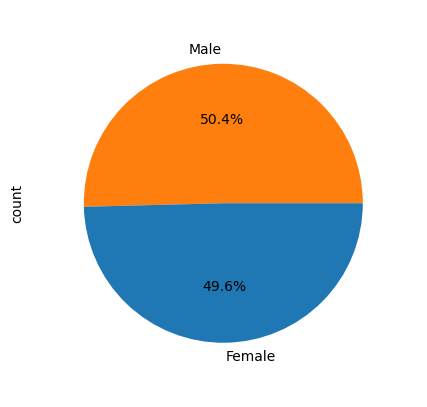

In [218]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
unique_mice_gender = cleaned_data.drop_duplicates(subset='Mouse ID', keep='first')
# Get the unique mice with their gender
gender_counts = unique_mice_gender['Sex'].value_counts()

# Make the pie chart
ax = gender_counts.plot(
    kind='pie', 
    figsize=(5, 7), 
    autopct="%1.1f%%",
    labels=['Male', 'Female'],
    colors=['#ff7f0e', '#1f77b4'],
    startangle=0, 
    radius=0.9,  
    legend=False)


plt.ylabel('count',fontsize=10)
plt.show()

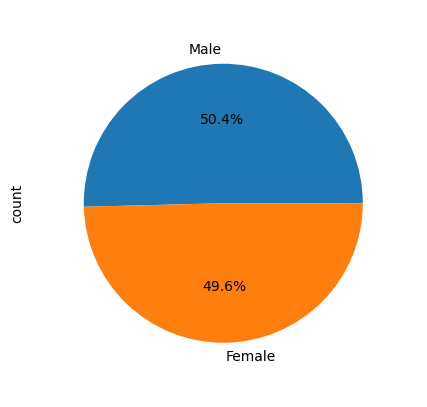

In [219]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
gender_counts = unique_mice_gender['Sex'].value_counts()
# Get the unique mice with their gender
unique_mice_gender = cleaned_data.drop_duplicates(subset='Mouse ID', keep='first') 

# Make the pie chart
fig, ax = plt.subplots(figsize=(5, 7))  
ax.pie(
    gender_counts, 
    labels=gender_counts.index,
    autopct='%1.1f%%',  
    colors=['#1f77b4','#ff7f0e'], 
    startangle=0,  
    radius=0.9  
)

plt.ylabel('count',fontsize=10)
plt.show()

## Quartiles, Outliers and Boxplots

In [220]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_data = cleaned_data[cleaned_data['Drug Regimen'].isin(treatments)]


# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = filtered_data.groupby('Mouse ID')['Timepoint'].max().reset_index()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_timepoint_data = pd.merge(last_timepoint, filtered_data, on=['Mouse ID','Timepoint'], how='left')


final_tumor_volumes = last_timepoint_data[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']]
final_tumor_volumes = final_tumor_volumes.sort_values(by=['Drug Regimen', 'Mouse ID'])

print(final_tumor_volumes)

   Mouse ID Drug Regimen  Tumor Volume (mm3)
9      b128    Capomulin           38.982878
12     b742    Capomulin           38.939633
24     f966    Capomulin           30.485985
25     g288    Capomulin           37.074024
26     g316    Capomulin           40.159220
..      ...          ...                 ...
71     s508     Ramicane           30.276232
77     u196     Ramicane           40.667713
87     w678     Ramicane           43.166373
94     y449     Ramicane           44.183451
98     z578     Ramicane           30.638696

[100 rows x 3 columns]


In [221]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = final_tumor_volumes[final_tumor_volumes['Drug Regimen'] == treatment]
    
    # add subset
    tumor_volumes.append(treatment_data['Tumor Volume (mm3)'])
    
# Determine outliers using upper and lower bounds
    Q1 = treatment_data['Tumor Volume (mm3)'].quantile(0.25)
    Q3 = treatment_data['Tumor Volume (mm3)'].quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3+ 1.5 * IQR
    
    outliers = treatment_data[(treatment_data['Tumor Volume (mm3)'] < lower_bound) | 
                                             (treatment_data['Tumor Volume (mm3)'] > upper_bound)]

    print(f"{treatment} outliers: {outliers['Tumor Volume (mm3)']}")



    


    



Capomulin outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


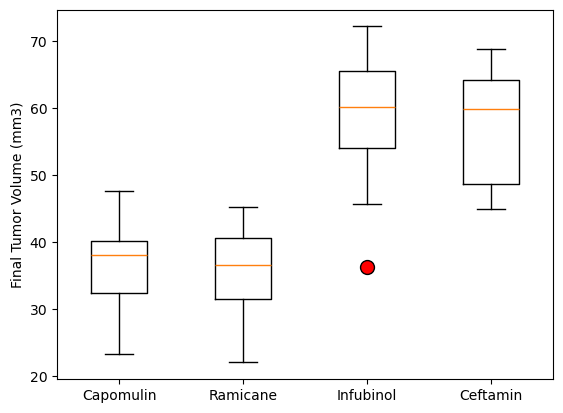

In [222]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
fig, ax1 = plt.subplots()

#Define flierprops to make the outliers red and fully filled
flierprops=dict(marker='o', markerfacecolor='red', markersize=10)
ax1.boxplot(tumor_volumes, flierprops=flierprops)

ax1.set_ylabel('Final Tumor Volume (mm3)')



ax1.set_xticklabels(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

# Display the plot
plt.show()

## Line and Scatter Plots

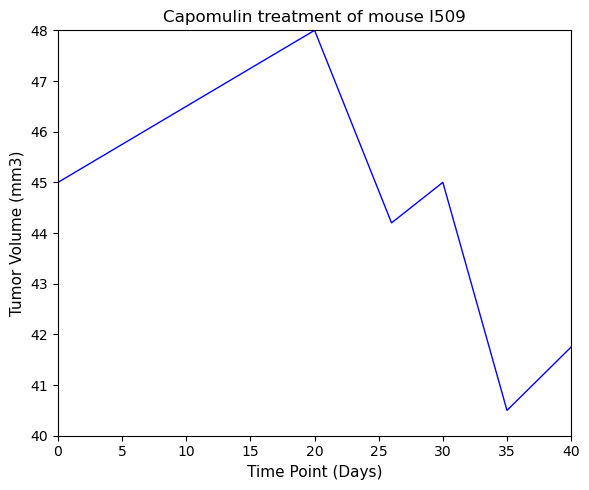

In [223]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
time_point = [0, 20, 26, 30, 35, 41] 

tumor_volume = [45, 48, 44.2, 45, 40.5, 42] 

plt.figure(figsize=(6,5))
plt.plot(time_point, tumor_volume, color='blue', linestyle='-', linewidth=1)  

# Add labels and title
plt.title('Capomulin treatment of mouse I509', fontsize=12)
plt.xlabel('Time Point (Days)', fontsize=11)
plt.ylabel('Tumor Volume (mm3)', fontsize=11)

# Set the y-axis range to 40 to 48
plt.ylim(40, 48)

# Set the x-axis range to 0 to 40
plt.xlim(0, 40)


# Display the plot

plt.tight_layout()
plt.show()


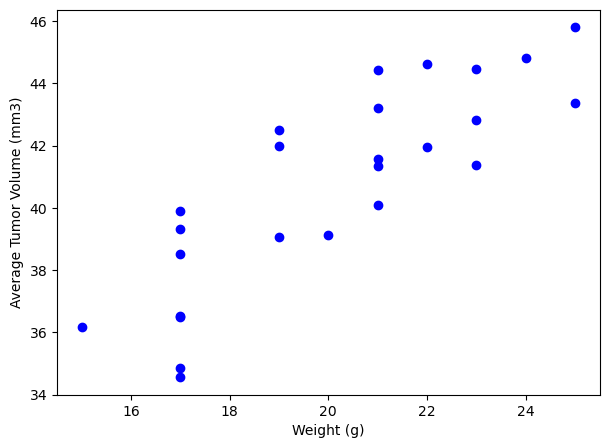

In [224]:
# Calculate the average observed tumor volume for the entire Capomulin regimen
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weights = capomulin_data.groupby('Mouse ID')['Weight (g)'].first()

# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
plt.figure(figsize=(7,5))
plt.scatter(mouse_weights, average_tumor_volume, color='blue')

plt.xlabel('Weight (g)', fontsize=10)
plt.ylabel('Average Tumor Volume (mm3)', fontsize=10)

plt.show()

## Correlation and Regression

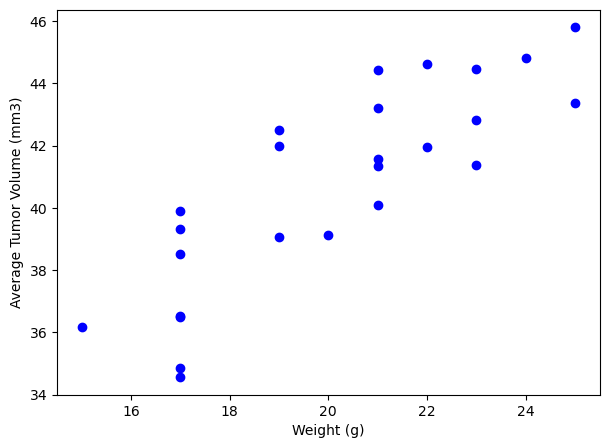

In [226]:


# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

plt.figure(figsize=(7,5))
plt.scatter(mouse_weights, average_tumor_volume, color='blue')

plt.xlabel('Weight (g)', fontsize=10)
plt.ylabel('Average Tumor Volume (mm3)', fontsize=10)

plt.show()
